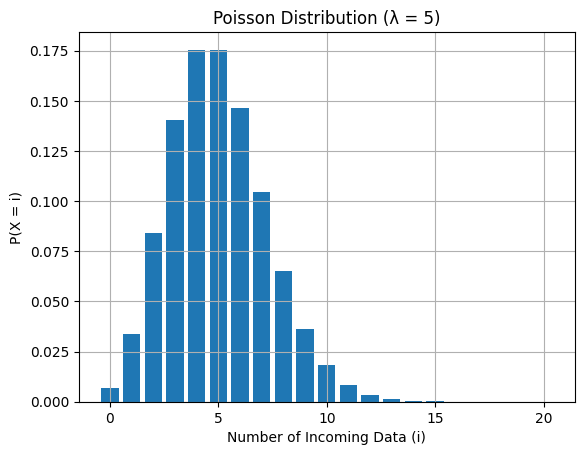

In [ ]:
#task - 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

def plot_poisson_distribution(lmbda, max_i=20):
    x = np.arange(0, max_i + 1)
    pmf = poisson.pmf(x, mu=lmbda)
    plt.bar(x, pmf)
    plt.title(f"Poisson Distribution (λ = {lmbda})")
    plt.xlabel("Number of Incoming Data (i)")
    plt.ylabel("P(X = i)")
    plt.grid(True)
    plt.show()

plot_poisson_distribution(lmbda=5)


In [ ]:
#task - 2
def sample_poisson(lmbda, size=10):
    return np.random.poisson(lam=lmbda, size=size)

print("Sample:", sample_poisson(5, 10))


Sample: [6 8 8 4 5 8 3 9 6 6]


In [ ]:
#task - 3
def simulate_queue(lmbda, process_time, time_steps=2000):
    queue = []
    waiting_lengths = []

    for t in range(time_steps):
        incoming = np.random.poisson(lmbda)
        queue.extend([process_time] * incoming)
        if queue:
            queue[0] -= 1
            if queue[0] <= 0:
                queue.pop(0)
        waiting_lengths.append(len(queue))
    
    return np.mean(waiting_lengths)

avg_wait_length = simulate_queue(0.1, 4)
print(f"Average waiting list length (λ=0.1, processing=4): {avg_wait_length:.2f}")


Average waiting list length (λ=0.1, processing=4): 0.41


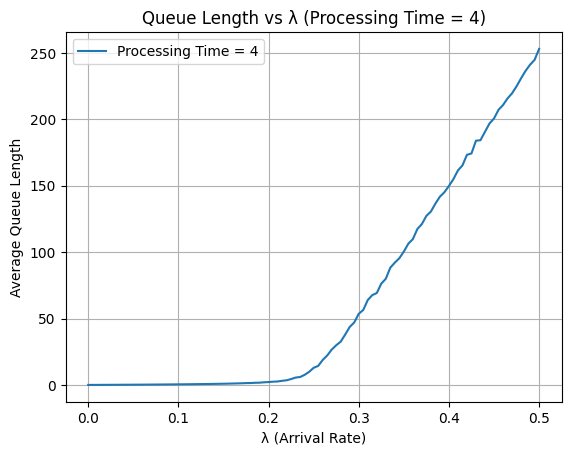

In [ ]:
#task 4
def average_queue_over_runs(lmbda_values, process_time, samples=200, time_steps=2000):
    avg_lengths = []
    for lmbda in lmbda_values:
        lengths = [simulate_queue(lmbda, process_time, time_steps) for _ in range(samples)]
        avg_lengths.append(np.mean(lengths))
    return avg_lengths

lambdas = np.arange(0, 0.505, 0.005)
avg_lengths_4 = average_queue_over_runs(lambdas, process_time=4)

plt.plot(lambdas, avg_lengths_4, label='Processing Time = 4')
plt.xlabel("λ (Arrival Rate)")
plt.ylabel("Average Queue Length")
plt.title("Queue Length vs λ (Processing Time = 4)")
plt.grid(True)
plt.legend()
plt.show()


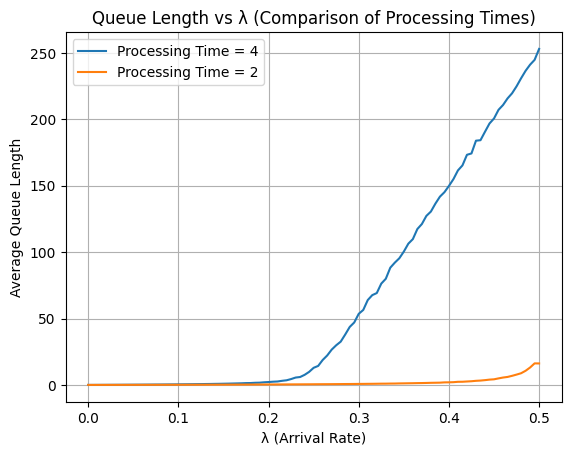

In [11]:
#task 5
avg_lengths_2 = average_queue_over_runs(lambdas, process_time=2)

plt.plot(lambdas, avg_lengths_4, label='Processing Time = 4')
plt.plot(lambdas, avg_lengths_2, label='Processing Time = 2')
plt.xlabel("λ (Arrival Rate)")
plt.ylabel("Average Queue Length")
plt.title("Queue Length vs λ (Comparison of Processing Times)")
plt.legend()
plt.grid(True)
plt.show()
